# Libraries

In [1]:
from platform import python_version

import numpy as np
import pandas as pd
import seaborn as sns
import math

print(f'python_version: {python_version()}')
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')
print(f'seaborn: {sns.__version__}')

python_version: 3.12.5
pandas: 2.2.3
numpy: 2.1.3
seaborn: 0.13.2


# Data

In [2]:
app_data = pd.read_csv('application_record.csv')
cre_data = pd.read_csv('credit_record.csv')
app_data.shape, cre_data.shape

((438557, 18), (1048575, 3))

In [3]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
cre_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


__checking missing values__

In [5]:
app_data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
cre_data.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

__checking datatypes__

In [7]:
app_data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [8]:
cre_data.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

# Clean Application Record Data

In [9]:
#Sort app data based on ID (in ascending order)
app_data.sort_values(by='ID', inplace=True)

In [10]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [11]:
# Filter duplicated IDs in app_data
app_data = app_data.drop_duplicates(subset='ID', keep='first')

In [12]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [13]:
app_data.shape

(438510, 18)

In [14]:
#For Columns "FLAG_OWN_CAR" and "FLAG_OWN_REALTY", replace "Y" with 1 and "N" with 0
app_data["FLAG_OWN_CAR"] = app_data["FLAG_OWN_CAR"].replace(["Y", "N"], [1, 0])
app_data["FLAG_OWN_REALTY"] = app_data["FLAG_OWN_REALTY"].replace(["Y", "N"], [1, 0])

C:\Users\zaqih\AppData\Local\Temp\ipykernel_20040\2040965041.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  app_data["FLAG_OWN_CAR"] = app_data["FLAG_OWN_CAR"].replace(["Y", "N"], [1, 0])
C:\Users\zaqih\AppData\Local\Temp\ipykernel_20040\2040965041.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  app_data["FLAG_OWN_REALTY"] = app_data["FLAG_OWN_REALTY"].replace(["Y", "N"], [1, 0])


In [15]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [16]:
# access row where ID is ('5008806')
app_data.loc[app_data['ID'] == 5008806]


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [17]:
# Calculate Applicant's Age and Years of Working and round up
app_data["Applicant_Age"] = (-app_data["DAYS_BIRTH"] / 365).apply(math.ceil)
app_data["Years_of_Working"] = (-app_data["DAYS_EMPLOYED"] / 365).apply(math.ceil)

# Display the updated DataFrame to verify
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Applicant_Age,Years_of_Working
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,33,13
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,33,13
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,59,4
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,53,9
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,53,9


In [18]:
#Count of rows where Age is less than 21
app_data["Applicant_Age"].describe()

count    438510.000000
mean         44.323281
std          11.467613
min          21.000000
25%          35.000000
50%          43.000000
75%          54.000000
max          70.000000
Name: Applicant_Age, dtype: float64

In [19]:
app_data.shape

(438510, 20)

In [20]:
app_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134188
CNT_FAM_MEMBERS             0
Applicant_Age               0
Years_of_Working            0
dtype: int64

In [21]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438510 entries, 0 to 424339
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  int64  
 3   FLAG_OWN_REALTY      438510 non-null  int64  
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL           4

In [22]:
#Filtering applicant that is less than 21 y.o.
#Filtering applicant with null/empty values in any fields
app_data = app_data[app_data["Applicant_Age"] >= 21].dropna()
app_data.shape

(304322, 20)

# Clean Credit Record Data

In [23]:
cre_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [24]:
cre_data.shape

(1048575, 3)

In [25]:
#Sort data based on ID (in ascending order).
cre_data = cre_data.sort_values(by=['ID', 'MONTHS_BALANCE'], ascending=[True, False])

cre_data.head(15)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [26]:
cre_data.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [27]:
cre_data['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

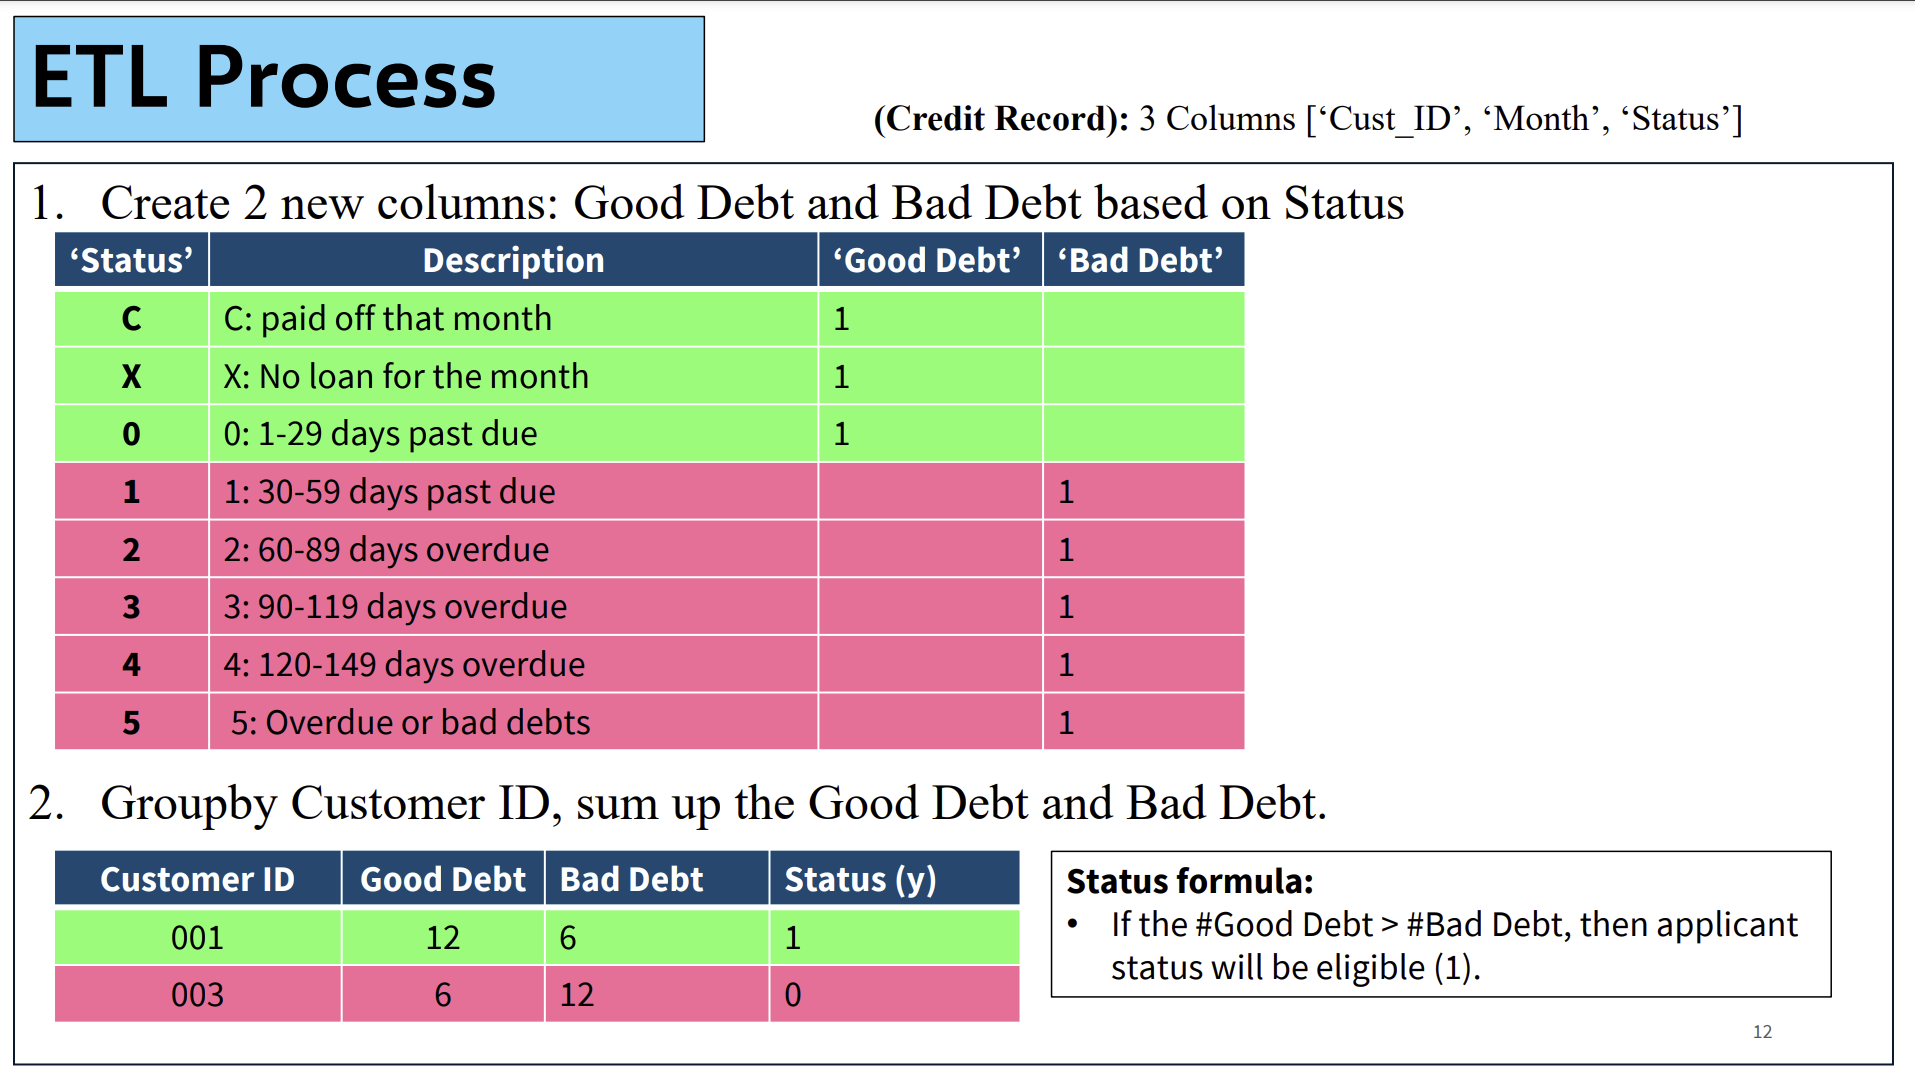

In [28]:
#Create 2 new columns: Good Debt and Bad Debt
# Create Total_Good_Debt (1 for 'C', 'X', '0' and 0 for others)
cre_data['Total_Good_Debt'] = cre_data['STATUS'].apply(lambda x: 1 if x in ['C', 'X', '0'] else 0)

# Create Total_Bad_Debt (1 for '1', '2', '3', '4', '5' and 0 for others)
cre_data['Total_Bad_Debt'] = cre_data['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)

# Display the updated DataFrame to verify the new columns
cre_data.head(5)

,ID,MONTHS_BALANCE,STATUS,Total_Good_Debt,Total_Bad_Debt
0,5001711,0,X,1,0
1,5001711,-1,0,1,0
2,5001711,-2,0,1,0
3,5001711,-3,0,1,0
4,5001712,0,C,1,0


In [29]:
#Group by ID And count Total_Good_Debt and Total_Bad_Debt
cre_data = cre_data.groupby('ID').agg({'Total_Good_Debt': 'sum', 'Total_Bad_Debt': 'sum'}).reset_index()
cre_data.head(5)

,ID,Total_Good_Debt,Total_Bad_Debt
0,5001711,4,0
1,5001712,19,0
2,5001713,22,0
3,5001714,15,0
4,5001715,60,0


In [30]:
# Calculate status column based on If the total of Good Debt is higher than Bad Debt, then an applicant status will be eligible (1), else (0).
cre_data['STATUS'] = cre_data.apply(lambda x: 1 if x['Total_Good_Debt'] > x['Total_Bad_Debt'] else 0, axis=1)

cre_data.head(5)

,ID,Total_Good_Debt,Total_Bad_Debt,STATUS
0,5001711,4,0,1
1,5001712,19,0,1
2,5001713,22,0,1
3,5001714,15,0,1
4,5001715,60,0,1


In [31]:
cre_data.isnull().sum()

ID                 0
Total_Good_Debt    0
Total_Bad_Debt     0
STATUS             0
dtype: int64

# Merging into final dataframe


In [32]:
# merge into final dataframe
final_df = pd.merge(app_data, cre_data, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Applicant_Age,Years_of_Working,Total_Good_Debt,Total_Bad_Debt,STATUS
0,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,59,4,30,0,1
1,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,53,9,5,0,1
2,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,53,9,5,0,1
3,5008810,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,53,9,27,0,1
4,5008811,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,53,9,39,0,1


In [33]:
final_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Applicant_Age',
       'Years_of_Working', 'Total_Good_Debt', 'Total_Bad_Debt', 'STATUS'],
      dtype='object')

In [34]:
final_df.shape

(25134, 23)

In [35]:
#Set final column names that are more easier to understand
#rename ID to Applicant_ID
final_df = final_df.rename(columns={'ID': 'Applicant_ID'})
final_df = final_df.rename(columns={'CODE_GENDER': 'Applicant_Gender'})
final_df = final_df.rename(columns={'FLAG_OWN_CAR': 'Owned_Car'})
final_df = final_df.rename(columns={'FLAG_OWN_REALTY': 'Owned_Realty'})
final_df = final_df.rename(columns={'CNT_CHILDREN': 'Total_Children'})
final_df = final_df.rename(columns={'AMT_INCOME_TOTAL': 'Total_Income'})
final_df = final_df.rename(columns={'NAME_INCOME_TYPE': 'Income_Type'})
final_df = final_df.rename(columns={'NAME_EDUCATION_TYPE': 'Education_Type'})
final_df = final_df.rename(columns={'NAME_FAMILY_STATUS': 'Family_Status'})
final_df = final_df.rename(columns={'NAME_HOUSING_TYPE': 'Housing_Type'})
final_df = final_df.rename(columns={'FLAG_MOBIL': 'Owned_Mobile_Phone'})
final_df = final_df.rename(columns={'FLAG_WORK_PHONE': 'Owned_Work_Phone'})
final_df = final_df.rename(columns={'FLAG_PHONE': 'Owned_Phone'})
final_df = final_df.rename(columns={'FLAG_EMAIL': 'Owned_Email'})
final_df = final_df.rename(columns={'OCCUPATION_TYPE': 'Job_Title'})
final_df = final_df.rename(columns={'CNT_FAM_MEMBERS': 'Total_Family_Members'})


In [36]:
#drop columns DAYS_BIRTH, DAYS_EMPLOYED
final_df = final_df.drop(columns=["DAYS_BIRTH", "DAYS_EMPLOYED"])

In [37]:
final_df.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Good_Debt', 'Total_Bad_Debt', 'STATUS'],
      dtype='object')

In [38]:
# Final Reorder
final_df = final_df[['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
                     'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
                     'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
                     'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
                     'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
                     'Total_Bad_Debt', 'Total_Good_Debt', 'STATUS']]

# Verify the column order
final_df.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'STATUS'],
      dtype='object')

In [ ]:
final_df

# Save to csv file

In [39]:
final_df.to_csv('Application_Data.csv', index=False)